# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [1]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [16]:

class walker:
    def __init__(self,x0,ndim = 1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        positions[0] = self.pos
        for i in range(1, n+1):
            direction = self.pickStep()
            positions[i] = positions[i-1] + direction
        return positions

#walker2 allows for function to be used in dimensions other than 1 dimension
class walker2:
    def __init__(self,x0,ndim, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        positions[0] = self.pos
        for i in range(1, n+1):
            direction = self.pickStep()
            positions[i] = positions[i-1] + direction
        return positions

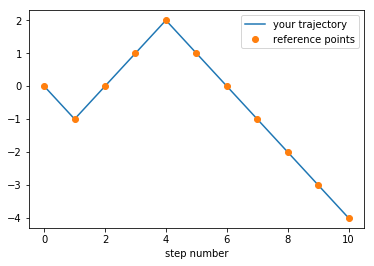

In [17]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

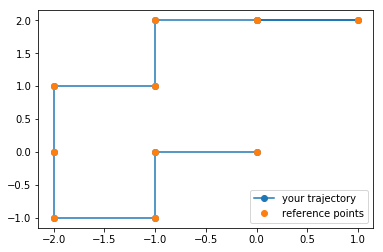

In [18]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

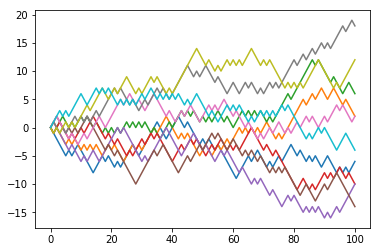

In [19]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


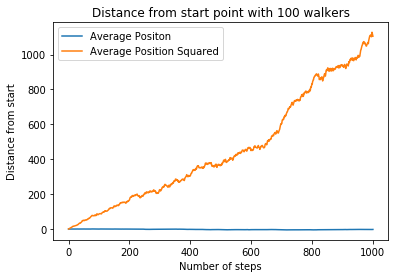

In [20]:
nsteps = 1000
ndim = 1
nwalkers = 100
x_values = numpy.linspace(0, nsteps, nsteps)

w = walker(0)

#Code below creates inital arrays of positions as numpy.empty values are non-zero when create 
total_position = w.doSteps(nsteps-1)
total_position_squared = total_position**2

for i in range (1, nwalkers):
    new_positions = w.doSteps(nsteps-1)
    total_position += new_positions
    total_position_squared += new_positions**2
    
avg_position = total_position/nwalkers
avg_position_squared = total_position_squared/nwalkers

plt.plot(x_values, avg_position, label = 'Average Positon')
plt.plot(x_values, avg_position_squared, label = 'Average Position Squared')
plt.legend(loc = 'upper left')
plt.ylabel('Distance from start')
plt.xlabel('Number of steps')
plt.title('Distance from start point with %d walkers' %nwalkers)
plt.show()

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


Text(0.5,1,'Comparison of average position squared for dimensions 1, 2, 3 and 4 and with 400 walkers')

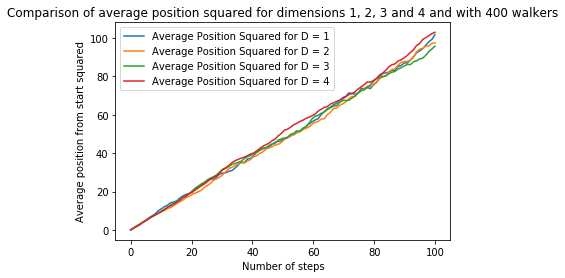

In [42]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)

x_values = numpy.linspace(0, nsteps, nsteps)

for i in dimensions:
    w = walker2(0, i) #class walker2 defined in cell with class walker
    total_position = w.doSteps(nsteps-1)
    total_position_squared = total_position**2
    for j in range (1, nwalkers):
        new_positions = w.doSteps(nsteps-1)
        for k in range (0, i):
            for l in range (0, nsteps):
                total_position_squared[l] += new_positions[l][k]**2
    #total_position_squared has same number of dimensions as i, with each internal array being equal, so below we simply -
    # - extract one of these arrays so we dont plot more than once for each dimension
    avg_position_squared = total_position_squared[:, 0]/nwalkers
    plt.plot(x_values, avg_position_squared, label = 'Average Position Squared for D = %s' %i)

plt.legend(loc = 'upper left')
plt.xlabel('Number of steps')
plt.ylabel('Average position from start squared')
plt.title('Comparison of average position squared for dimensions 1, 2, 3 and 4 and with %s walkers' %nwalkers)

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


[[[ 0.00000000e+000  0.00000000e+000  2.00506226e-316 ...
   -1.39999998e+000  1.25000000e+000 -1.39999998e+000]
  [ 0.00000000e+000  0.00000000e+000  1.35000002e+000 ...
    1.29133565e+228  1.02047929e+253  8.59603044e-043]]

 [[-1.00000000e+000  0.00000000e+000  2.93750275e+025 ...
    2.14422480e+213  1.59458849e+016  4.48360617e+079]
  [ 0.00000000e+000 -1.00000000e+000  1.04340934e+011 ...
    4.02688628e-076  1.36718328e-056  1.06266698e+247]]

 [[ 0.00000000e+000  1.00000000e+000  1.05442542e+165 ...
    1.26510348e+065  2.72285921e+103  9.13368017e+203]
  [ 0.00000000e+000 -1.00000000e+000  2.92663554e+165 ...
    1.87612620e-051  8.67003146e+045  3.94064247e+069]]

 ...

 [[ 1.00000000e+000  1.00000000e+000 -1.94572552e-010 ...
    1.46795930e+065  1.73124404e+065  1.99452879e+065]
  [-2.00000000e+000 -2.00000000e+000  3.46252023e+065 ...
    2.66317591e+140  3.13952420e+140  3.61587250e+140]]

 [[ 1.00000000e+000  0.00000000e+000  6.27910655e+140 ...
    4.83150526e+215  5.6

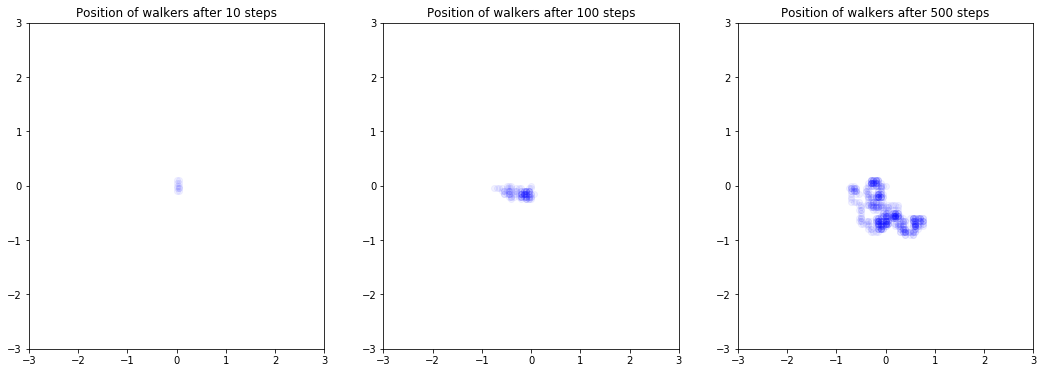

In [80]:
ndim=2
nwalkers=1000
step1 = 10
step2 = 100
step3 = 500
stepsize = 0.05

w = walker2(0, 2)

walker_array = numpy.empty([step1, ndim, nwalkers])
# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))

for j in range (0, 2):
    walker_array[:, :, j] = w.doSteps(step1 - 1)
print(walker_array)    
for i, nsteps in enumerate([step1,step2,step3]):
    rand_pos = w.doSteps(nsteps)
    plt.subplot(131+i)
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.title("Position of walkers after %d steps" %nsteps)    
    plt.scatter(stepsize*rand_pos[:,0], stepsize*rand_pos[:,1], c = 'blue', alpha=0.05)